<a href="https://colab.research.google.com/github/Ekaterina245/Alexnet/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import math
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Statistika/movies_dataset_1.csv", delimiter=',', index_col='Unnamed: 0')
df

,User_Id,Movie_Name,Rating,Genre
0,1,Pulp Fiction (1994),5.0,Comedy|Crime|Drama|Thriller
1,1,Three Colors: Red (Trois couleurs: Rouge) (1994),3.5,Drama
2,1,Three Colors: Blue (Trois couleurs: Bleu) (1993),5.0,Drama
3,1,Underground (1995),5.0,Comedy|Drama|War
4,1,Singin' in the Rain (1952),3.5,Comedy|Musical|Romance
...,...,...,...,...
25000090,162541,Ratatouille (2007),4.5,Animation|Children|Drama
25000091,162541,Bee Movie (2007),2.5,Animation|Comedy
25000092,162541,Alvin and the Chipmunks (2007),2.0,Children|Comedy
25000093,162541,"Dark Knight, The (2008)",4.0,Action|Crime|Drama|IMAX


In [4]:
df.columns

Index(['User_Id', 'Movie_Name', 'Rating', 'Genre'], dtype='object')

Таблица для определенного пользователя

In [5]:
df_for_1 = df.loc[df['User_Id']. isin([1])]
df_for_1

,User_Id,Movie_Name,Rating,Genre
0,1,Pulp Fiction (1994),5.0,Comedy|Crime|Drama|Thriller
1,1,Three Colors: Red (Trois couleurs: Rouge) (1994),3.5,Drama
2,1,Three Colors: Blue (Trois couleurs: Bleu) (1993),5.0,Drama
3,1,Underground (1995),5.0,Comedy|Drama|War
4,1,Singin' in the Rain (1952),3.5,Comedy|Musical|Romance
...,...,...,...,...
65,1,Taxi 2 (2000),3.0,Action|Comedy
66,1,2046 (2004),4.5,Drama|Fantasy|Romance|Sci-Fi
67,1,"Very Long Engagement, A (Un long dimanche de f...",3.0,Drama|Mystery|Romance|War
68,1,5x2 (2004),3.5,Drama|Romance


In [6]:
#Массив из всех оценок одного пользователя
y=pd.DataFrame(df_for_1['Rating']).values.ravel()
y

array([5. , 3.5, 5. , 5. , 3.5, 4. , 3.5, 3.5, 5. , 4. , 3.5, 4. , 2.5,
       2.5, 2.5, 3.5, 4.5, 4. , 5. , 5. , 4.5, 4. , 5. , 5. , 5. , 3. ,
       5. , 3. , 4. , 4.5, 4. , 0.5, 2. , 5. , 4. , 3. , 4. , 5. , 4.5,
       4. , 3.5, 5. , 3.5, 4. , 4.5, 2. , 3.5, 3.5, 5. , 4. , 2.5, 3. ,
       2.5, 2.5, 4.5, 3.5, 5. , 5. , 4. , 3.5, 1. , 3.5, 4. , 3. , 4. ,
       3. , 4.5, 3. , 3.5, 5. ])

In [ ]:
sorted(y)

In [8]:
#Медианное значение рейтинга
np.median(y)

4.0

In [9]:
#Среднее значение рейтинга
np.mean(y)

3.8142857142857145

<ipython-input-10-b2d76035089b>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, hist=True, kde=False,


Text(0, 0.5, 'Quantity')

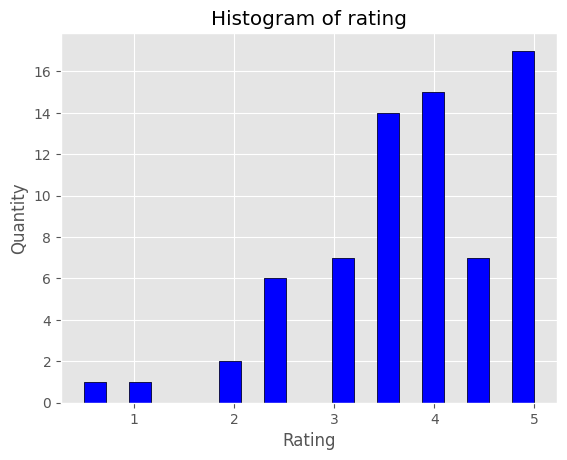

In [10]:
# Гистограмма частоты оценок
plt.hist(y, color = 'blue', edgecolor = 'black',
         bins = int(100/5))

sns.distplot(y, hist=True, kde=False, 
             bins=int(100/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Labels
plt.title('Histogram of rating')
plt.xlabel('Rating')
plt.ylabel('Quantity')


Медианное значение рейтинга для первых 100 пользователей

In [11]:
med = [0]*100

In [12]:
for i in range (1,100):
  df_for_100 = df.loc[df['User_Id']. isin([i])]
  y=pd.DataFrame(df_for_100['Rating']).values.ravel()
  med[i] = np.median(y)

In [13]:
len(med)

100

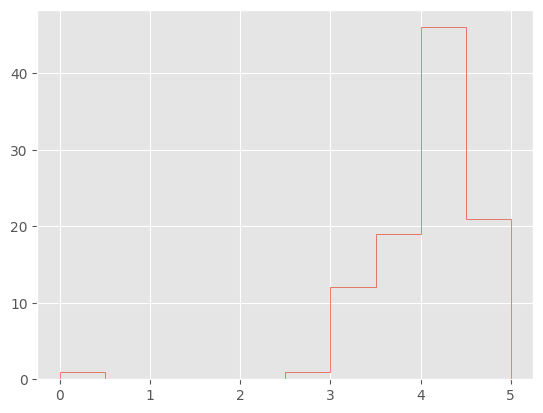

In [14]:
#Гистограмма медианных значений рейтинга первых 100 пользователей
counts, bins = np.histogram(med)
plt.stairs(counts, bins)

In [15]:
np.median(sorted(med))

4.0

In [16]:
np.mean(med)

3.885

Разделение жанров фильмов

In [17]:
df_for_1['Genre'] = df_for_1['Genre'].str.split('|')
dfx = pd.get_dummies(pd.DataFrame(df_for_1['Genre'].tolist()).stack()).sum(level=0)
df_for_1 = pd.concat([df_for_1, dfx], axis=1).drop(columns=['Genre'])
print(df_for_1)

    User_Id                                         Movie_Name  Rating  \
0         1                                Pulp Fiction (1994)     5.0   
1         1   Three Colors: Red (Trois couleurs: Rouge) (1994)     3.5   
2         1   Three Colors: Blue (Trois couleurs: Bleu) (1993)     5.0   
3         1                                 Underground (1995)     5.0   
4         1                         Singin' in the Rain (1952)     3.5   
..      ...                                                ...     ...   
65        1                                      Taxi 2 (2000)     3.0   
66        1                                        2046 (2004)     4.5   
67        1  Very Long Engagement, A (Un long dimanche de f...     3.0   
68        1                                         5x2 (2004)     3.5   
69        1                Look at Me (Comme une image) (2004)     5.0   

    Action  Adventure  Animation  Children  Comedy  Crime  Documentary  ...  \
0        0          0          0

<ipython-input-17-6ef07fe891ad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_1['Genre'] = df_for_1['Genre'].str.split('|')
<ipython-input-17-6ef07fe891ad>:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  dfx = pd.get_dummies(pd.DataFrame(df_for_1['Genre'].tolist()).stack()).sum(level=0)


In [18]:
df_for_1.columns

Index(['User_Id', 'Movie_Name', 'Rating', 'Action', 'Adventure', 'Animation',
       'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western'],
      dtype='object')

Подсчёт среднего значения для одной категории

In [19]:
DR = pd.DataFrame(df_for_1['Western']).values.ravel()
DR

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=uint8)

In [20]:
Rat = pd.DataFrame(df_for_1['Rating']).values.ravel()
print ("Original list 1 : " + str(Rat))
len(Rat)

Original list 1 : [5.  3.5 5.  5.  3.5 4.  3.5 3.5 5.  4.  3.5 4.  2.5 2.5 2.5 3.5 4.5 4.
 5.  5.  4.5 4.  5.  5.  5.  3.  5.  3.  4.  4.5 4.  0.5 2.  5.  4.  3.
 4.  5.  4.5 4.  3.5 5.  3.5 4.  4.5 2.  3.5 3.5 5.  4.  2.5 3.  2.5 2.5
 4.5 3.5 5.  5.  4.  3.5 1.  3.5 4.  3.  4.  3.  4.5 3.  3.5 5. ]


70

In [21]:
res_list = []
for i in range(0, len(DR)):
    res_list.append(DR[i] * Rat[i])
print ("Resultant list is : " + str(res_list))
len(res_list)

Resultant list is : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


70

In [22]:
sr_cat = sum(res_list)/sum(DR)
sr_cat

2.5

Подсчет средних значений для всех категорий

In [23]:
list1 = ['Action', 'Adventure', 'Animation',
       'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western']

In [24]:
# Цикл считает средний рейтинг за каждую категорию фильма
sr_cat_vse = []
sum_kolva_film = []
for column in list1:
  DR = pd.DataFrame(df_for_1[column]).values.ravel()
  res_list = []
  for j in range(0, len(Rat)):
    res_list.append(DR[j] * Rat[j])
  sum_kolva_film.append(sum(DR))
  sr_cat_vse.append(sum(res_list)/sum(DR))

In [ ]:
sr_cat_vse

In [26]:
# Количество фильмов в каждой категории
sum_kolva_film

[4, 11, 2, 3, 23, 8, 1, 53, 5, 1, 1, 5, 4, 18, 5, 5, 5, 1]

In [27]:
# Вывожу категорию и рейтинг 
for i in range(0, len(sr_cat_vse)):
    print (list1[i] + ': ' + str(sr_cat_vse[i]))

Action: 4.125
Adventure: 3.727272727272727
Animation: 4.0
Children: 3.8333333333333335
Comedy: 3.869565217391304
Crime: 4.0625
Documentary: 2.0
Drama: 3.8679245283018866
Fantasy: 3.6
Film-Noir: 3.5
Horror: 3.5
Musical: 3.7
Mystery: 3.5
Romance: 4.166666666666667
Sci-Fi: 3.7
Thriller: 4.3
War: 3.9
Western: 2.5


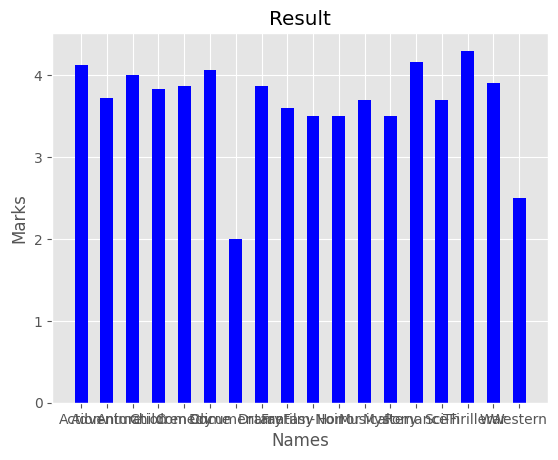

In [28]:
# Столбчатая нагляднее, но не видно названий
plt.bar(list1,sr_cat_vse,color = 'blue', width = 0.5)   
plt.title('Result')   
plt.xlabel('Names')   
plt.ylabel('Marks')   
plt.show()

ValueError: ignored

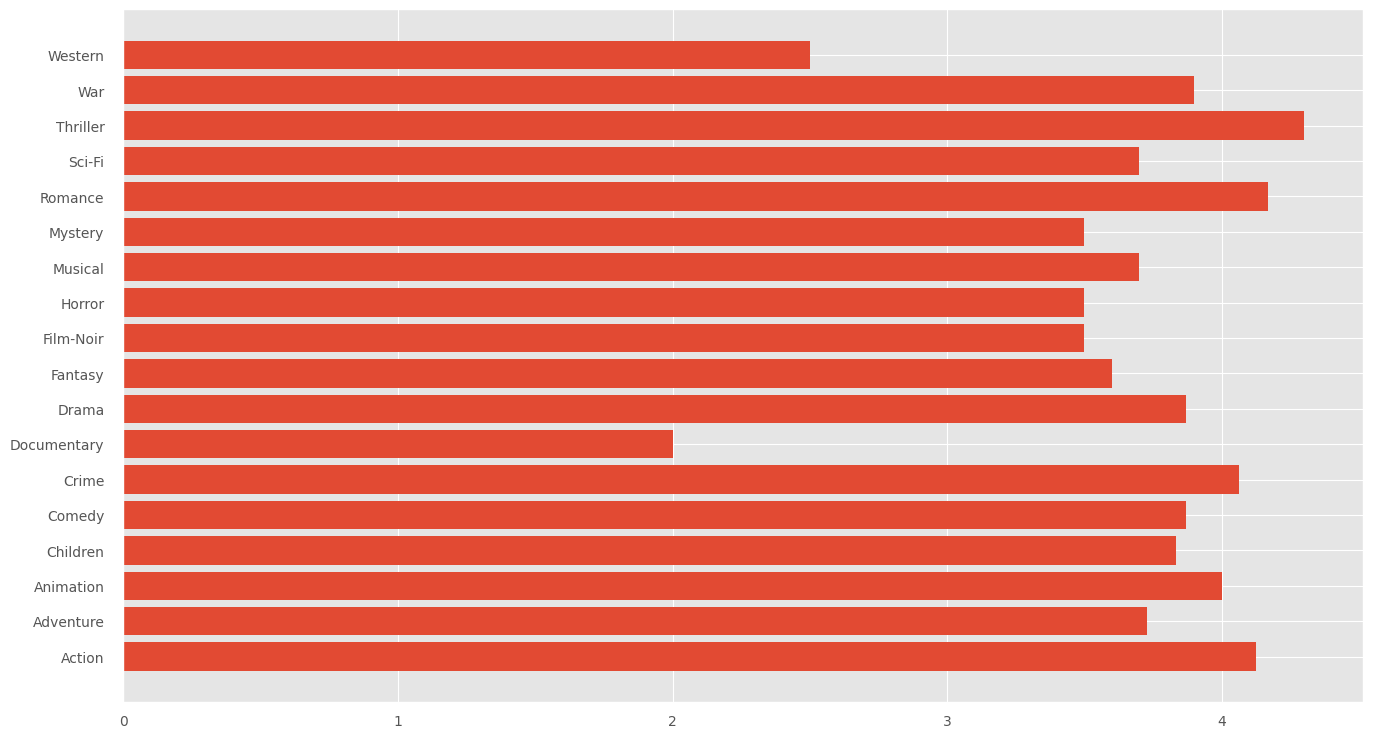

In [29]:
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(list1, sr_cat_vse)
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 # Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Sports car and their price in crore',
             loc ='left', )
 
# Add Text watermark
fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
 
# Show Plot
plt.show()

In [30]:
# Максимальное значение рейтинга
# Может быть объединить это все в новую таблицу чтобы сразу выводилось
max(sr_cat_vse)

4.3

График, показывающий какой жанр у пользователя пребладает

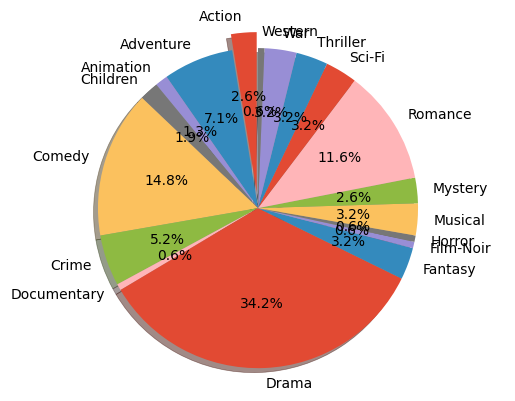

In [31]:
explode =(0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)  
   
fig1, ax1 = plt.subplots()   
ax1.pie(sum_kolva_film, explode=explode, labels=list1, autopct='%1.1f%%',   
        shadow=True, startangle=90)   
ax1.axis('equal')  
   
plt.show() 

# Опять ничего не видно
# Нужно удалить фильмы, которые совссем мало встречаются, например, меньше 6 раз

In [32]:
sum_kolva_film, print(list1)

['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


([4, 11, 2, 3, 23, 8, 1, 53, 5, 1, 1, 5, 4, 18, 5, 5, 5, 1], None)

In [33]:
# Видимо лучше добавлять в новый массив, потому что не удаляются некоторые фильмы
new_name = []
new_kol = []
# Удалить из массива количество <6 и соответсвующую категорию
for i in range(0, len(sum_kolva_film)):
    if sum_kolva_film[i] > 6:
      new_name.append(list1[i])
      new_kol.append(sum_kolva_film[i])

In [34]:
new_name, new_kol

(['Adventure', 'Comedy', 'Crime', 'Drama', 'Romance'], [11, 23, 8, 53, 18])

In [35]:
len(new_name)

5

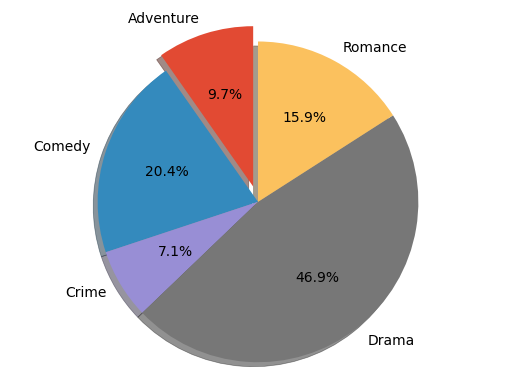

In [36]:
explode =(0.1, 0, 0, 0, 0)  
   
fig1, ax1 = plt.subplots()   
ax1.pie(new_kol, explode=explode, labels=new_name, autopct='%1.1f%%',   
        shadow=True, startangle=90)   
ax1.axis('equal')  

   
plt.show() 


In [37]:
list2 = ['Action', 'Adventure', 'Animation',
       'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western']

In [38]:
sum_kolva_film2 = []
for column in list1:
  DR = pd.DataFrame(df_for_1[column]).values.ravel()
  
  sum_kolva_film2.append(sum(DR))

In [39]:
sr_cat_vse

[4.125,
 3.727272727272727,
 4.0,
 3.8333333333333335,
 3.869565217391304,
 4.0625,
 2.0,
 3.8679245283018866,
 3.6,
 3.5,
 3.5,
 3.7,
 3.5,
 4.166666666666667,
 3.7,
 4.3,
 3.9,
 2.5]

In [40]:
sum_kolva_film2

[4, 11, 2, 3, 23, 8, 1, 53, 5, 1, 1, 5, 4, 18, 5, 5, 5, 1]

In [41]:
# Вывод фильмов у которых больший рейтинг
new_name_2 = []
new_kol_2 = []
# Записать в новый массив только те фильмы, у которых рейтинг > 4
for i in range(0, len(sr_cat_vse)):
    if sr_cat_vse[i] > 4:
      new_name_2.append(list2[i])
      new_kol_2.append(sum_kolva_film2[i])

In [42]:
new_kol_2

[4, 8, 18, 5]

In [43]:
new_name_2

['Action', 'Crime', 'Romance', 'Thriller']

In [44]:
len(new_name_2)

4

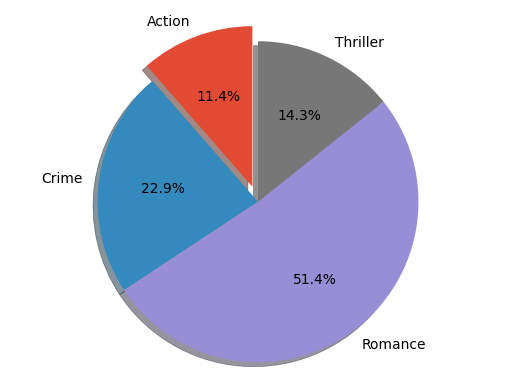

In [45]:
explode =(0.1, 0, 0, 0)  
   
fig1, ax1 = plt.subplots()   
ax1.pie(new_kol_2, explode=explode, labels=new_name_2, autopct='%1.1f%%',   
        shadow=True, startangle=90)   
ax1.axis('equal')  
   
plt.show() 

In [46]:
# Вывожу категорию и рейтинг 
for i in range(0, len(sr_cat_vse)):
    print (list1[i] + ': ' + str(sr_cat_vse[i]) + '   Kolvo:' + str(sum_kolva_film[i]))

Action: 4.125   Kolvo:4
Adventure: 3.727272727272727   Kolvo:11
Animation: 4.0   Kolvo:2
Children: 3.8333333333333335   Kolvo:3
Comedy: 3.869565217391304   Kolvo:23
Crime: 4.0625   Kolvo:8
Documentary: 2.0   Kolvo:1
Drama: 3.8679245283018866   Kolvo:53
Fantasy: 3.6   Kolvo:5
Film-Noir: 3.5   Kolvo:1
Horror: 3.5   Kolvo:1
Musical: 3.7   Kolvo:5
Mystery: 3.5   Kolvo:4
Romance: 4.166666666666667   Kolvo:18
Sci-Fi: 3.7   Kolvo:5
Thriller: 4.3   Kolvo:5
War: 3.9   Kolvo:5
Western: 2.5   Kolvo:1


Обучение классификационной нейросети

In [47]:
df_min = df[:4000]
df_min

,User_Id,Movie_Name,Rating,Genre
0,1,Pulp Fiction (1994),5.0,Comedy|Crime|Drama|Thriller
1,1,Three Colors: Red (Trois couleurs: Rouge) (1994),3.5,Drama
2,1,Three Colors: Blue (Trois couleurs: Bleu) (1993),5.0,Drama
3,1,Underground (1995),5.0,Comedy|Drama|War
4,1,Singin' in the Rain (1952),3.5,Comedy|Musical|Romance
...,...,...,...,...
3995,23,Jean de Florette (1986),3.0,Drama|Mystery
3996,23,Manon of the Spring (Manon des sources) (1986),3.0,Drama
3997,23,When We Were Kings (1996),5.0,Documentary
3998,23,Cinema Paradiso (Nuovo cinema Paradiso) (1989),5.0,Drama


In [48]:
df_min['Genre'] = df_min['Genre'].str.split('|')
dfx = pd.get_dummies(pd.DataFrame(df_min['Genre'].tolist()).stack()).sum(level=0)
df_min = pd.concat([df_min, dfx], axis=1).drop(columns=['Genre'])
print(df_min)

      User_Id                                        Movie_Name  Rating  \
0           1                               Pulp Fiction (1994)     5.0   
1           1  Three Colors: Red (Trois couleurs: Rouge) (1994)     3.5   
2           1  Three Colors: Blue (Trois couleurs: Bleu) (1993)     5.0   
3           1                                Underground (1995)     5.0   
4           1                        Singin' in the Rain (1952)     3.5   
...       ...                                               ...     ...   
3995       23                           Jean de Florette (1986)     3.0   
3996       23    Manon of the Spring (Manon des sources) (1986)     3.0   
3997       23                         When We Were Kings (1996)     5.0   
3998       23    Cinema Paradiso (Nuovo cinema Paradiso) (1989)     5.0   
3999       23                       English Patient, The (1996)     5.0   

      (no genres listed)  Action  Adventure  Animation  Children  Comedy  \
0                      

<ipython-input-48-7a68a95864b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_min['Genre'] = df_min['Genre'].str.split('|')
<ipython-input-48-7a68a95864b6>:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  dfx = pd.get_dummies(pd.DataFrame(df_min['Genre'].tolist()).stack()).sum(level=0)


In [ ]:
X = pd.DataFrame(df_min.drop(['Rating', 'Movie_Name', '(no genres listed)'], axis=1))
#X = pd.DataFrame(df_min.drop(['Movie_Name'], axis=1))
X

,User_Id,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,23,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3996,23,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3997,23,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3998,23,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [49]:
y = pd.DataFrame(df_min['Rating']).values.ravel()
y

array([5. , 3.5, 5. , ..., 5. , 5. , 5. ])

In [50]:
#подключение модели логистической регрессии из библиотеки sklearn
from sklearn.linear_model import LogisticRegression

In [51]:
from sys import last_type
lst = df_min.User_Id.unique()
lst

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23])

In [52]:
# Массивы для среднего рейтинга по категориям
med2 = [0]*24
res_list_2 = [0]*24
sr_sum = []
sr_sum_A = []
sr_sum_An  = []
sr_sum_Ch = []
sr_sum_Co = []
sr_sum_Cr = []
sr_sum_Do = []
sr_sum_Dr = []
sr_sum_Fa = []
sr_sum_FN = []
sr_sum_Ho = []
sr_sum_Mu = []
sr_sum_My = []
sr_sum_Ro = []
sr_sum_SF = []
sr_sum_Th = []
sr_sum_Wa = []
sr_sum_We = []

In [53]:
# В массив sr_sum будут записываться средние значение рейтинга одной категории для разных пользоателей
for i in range (1,24):
  df_1 = df_min.loc[df_min['User_Id']. isin([i])]
  y=pd.DataFrame(df_1['Action']).values.ravel()
  X = pd.DataFrame(df_1['Rating']).values.ravel()
  res_list_2 = []
  for i in range(0, len(y)):
    res_list_2.append(y[i] * X[i])
    sr_sum3 = sum(res_list_2)/sum(y)
  sr_sum.append(sr_sum3)
len(sr_sum)

23

In [54]:
for i in range (1,24):
  df_1 = df_min.loc[df_min['User_Id']. isin([i])]
  y=pd.DataFrame(df_1['Adventure']).values.ravel()
  X = pd.DataFrame(df_1['Rating']).values.ravel()
  res_list_2 = []
  for i in range(0, len(y)):
    res_list_2.append(y[i] * X[i])
    sr_sum3 = sum(res_list_2)/sum(y)
  sr_sum_A.append(sr_sum3)
len(sr_sum_A)

23

In [55]:
for i in range (1,24):
  df_1 = df_min.loc[df_min['User_Id']. isin([i])]
  y=pd.DataFrame(df_1['Animation']).values.ravel()
  X = pd.DataFrame(df_1['Rating']).values.ravel()
  res_list_2 = []
  for i in range(0, len(y)):
    res_list_2.append(y[i] * X[i])
    sr_sum3 = sum(res_list_2)/sum(y)
  sr_sum_An.append(sr_sum3)
len(sr_sum_An)

<ipython-input-55-b16be800e855>:8: RuntimeWarning: invalid value encountered in scalar divide
  sr_sum3 = sum(res_list_2)/sum(y)
<ipython-input-55-b16be800e855>:8: RuntimeWarning: invalid value encountered in scalar divide
  sr_sum3 = sum(res_list_2)/sum(y)


23

In [56]:
for i in range (1,24):
  df_1 = df_min.loc[df_min['User_Id']. isin([i])]
  y=pd.DataFrame(df_1['Children']).values.ravel()
  X = pd.DataFrame(df_1['Rating']).values.ravel()
  res_list_2 = []
  for i in range(0, len(y)):
    res_list_2.append(y[i] * X[i])
    sr_sum3 = sum(res_list_2)/sum(y)
  sr_sum_Ch.append(sr_sum3)
len(sr_sum_Ch)

<ipython-input-56-06b07abee99d>:8: RuntimeWarning: invalid value encountered in scalar divide
  sr_sum3 = sum(res_list_2)/sum(y)


23

In [57]:
for i in range (1,24):
  df_1 = df_min.loc[df_min['User_Id']. isin([i])]
  y=pd.DataFrame(df_1['Comedy']).values.ravel()
  X = pd.DataFrame(df_1['Rating']).values.ravel()
  res_list_2 = []
  for i in range(0, len(y)):
    res_list_2.append(y[i] * X[i])
    sr_sum3 = sum(res_list_2)/sum(y)
  sr_sum_Co.append(sr_sum3)
len(sr_sum_Co)

23

In [58]:
for i in range (1,24):
  df_1 = df_min.loc[df_min['User_Id']. isin([i])]
  y=pd.DataFrame(df_1['Crime']).values.ravel()
  X = pd.DataFrame(df_1['Rating']).values.ravel()
  res_list_2 = []
  for i in range(0, len(y)):
    res_list_2.append(y[i] * X[i])
    sr_sum3 = sum(res_list_2)/sum(y)
  sr_sum_Cr.append(sr_sum3)
len(sr_sum_Cr)

23

In [59]:
for i in range (1,24):
  df_1 = df_min.loc[df_min['User_Id']. isin([i])]
  y=pd.DataFrame(df_1['Documentary']).values.ravel()
  X = pd.DataFrame(df_1['Rating']).values.ravel()
  res_list_2 = []
  for i in range(0, len(y)):
    res_list_2.append(y[i] * X[i])
    sr_sum3 = sum(res_list_2)/sum(y)
  sr_sum_Do.append(sr_sum3)
len(sr_sum_Do)

<ipython-input-59-317acf9f168b>:8: RuntimeWarning: invalid value encountered in scalar divide
  sr_sum3 = sum(res_list_2)/sum(y)
<ipython-input-59-317acf9f168b>:8: RuntimeWarning: invalid value encountered in scalar divide
  sr_sum3 = sum(res_list_2)/sum(y)
<ipython-input-59-317acf9f168b>:8: RuntimeWarning: invalid value encountered in scalar divide
  sr_sum3 = sum(res_list_2)/sum(y)
<ipython-input-59-317acf9f168b>:8: RuntimeWarning: invalid value encountered in scalar divide
  sr_sum3 = sum(res_list_2)/sum(y)
<ipython-input-59-317acf9f168b>:8: RuntimeWarning: invalid value encountered in scalar divide
  sr_sum3 = sum(res_list_2)/sum(y)
<ipython-input-59-317acf9f168b>:8: RuntimeWarning: invalid value encountered in scalar divide
  sr_sum3 = sum(res_list_2)/sum(y)
<ipython-input-59-317acf9f168b>:8: RuntimeWarning: invalid value encountered in scalar divide
  sr_sum3 = sum(res_list_2)/sum(y)
<ipython-input-59-317acf9f168b>:8: RuntimeWarning: invalid value encountered in scalar divide
  s

23

In [60]:
for i in range (1,24):
  df_1 = df_min.loc[df_min['User_Id']. isin([i])]
  y=pd.DataFrame(df_1['Drama']).values.ravel()
  X = pd.DataFrame(df_1['Rating']).values.ravel()
  res_list_2 = []
  for i in range(0, len(y)):
    res_list_2.append(y[i] * X[i])
    sr_sum3 = sum(res_list_2)/sum(y)
  sr_sum_Dr.append(sr_sum3)
len(sr_sum_Dr)

23

In [61]:
for i in range (1,24):
  df_1 = df_min.loc[df_min['User_Id']. isin([i])]
  y=pd.DataFrame(df_1['Fantasy']).values.ravel()
  X = pd.DataFrame(df_1['Rating']).values.ravel()
  res_list_2 = []
  for i in range(0, len(y)):
    res_list_2.append(y[i] * X[i])
    sr_sum3 = sum(res_list_2)/sum(y)
  sr_sum_Fa.append(sr_sum3)
len(sr_sum_Fa)

23

In [62]:
for i in range (1,24):
  df_1 = df_min.loc[df_min['User_Id']. isin([i])]
  y=pd.DataFrame(df_1['Film-Noir']).values.ravel()
  X = pd.DataFrame(df_1['Rating']).values.ravel()
  res_list_2 = []
  for i in range(0, len(y)):
    res_list_2.append(y[i] * X[i])
    sr_sum3 = sum(res_list_2)/sum(y)
  sr_sum_FN.append(sr_sum3)
len(sr_sum_FN)

<ipython-input-62-73167b0efe29>:8: RuntimeWarning: invalid value encountered in scalar divide
  sr_sum3 = sum(res_list_2)/sum(y)
<ipython-input-62-73167b0efe29>:8: RuntimeWarning: invalid value encountered in scalar divide
  sr_sum3 = sum(res_list_2)/sum(y)
<ipython-input-62-73167b0efe29>:8: RuntimeWarning: invalid value encountered in scalar divide
  sr_sum3 = sum(res_list_2)/sum(y)
<ipython-input-62-73167b0efe29>:8: RuntimeWarning: invalid value encountered in scalar divide
  sr_sum3 = sum(res_list_2)/sum(y)
<ipython-input-62-73167b0efe29>:8: RuntimeWarning: invalid value encountered in scalar divide
  sr_sum3 = sum(res_list_2)/sum(y)
<ipython-input-62-73167b0efe29>:8: RuntimeWarning: invalid value encountered in scalar divide
  sr_sum3 = sum(res_list_2)/sum(y)
<ipython-input-62-73167b0efe29>:8: RuntimeWarning: invalid value encountered in scalar divide
  sr_sum3 = sum(res_list_2)/sum(y)
<ipython-input-62-73167b0efe29>:8: RuntimeWarning: invalid value encountered in scalar divide
  s

23

In [63]:
for i in range (1,24):
  df_1 = df_min.loc[df_min['User_Id']. isin([i])]
  y=pd.DataFrame(df_1['Horror']).values.ravel()
  X = pd.DataFrame(df_1['Rating']).values.ravel()
  res_list_2 = []
  for i in range(0, len(y)):
    res_list_2.append(y[i] * X[i])
    sr_sum3 = sum(res_list_2)/sum(y)
  sr_sum_Ho.append(sr_sum3)
len(sr_sum_Ho)

<ipython-input-63-2db4bf6fe3cc>:8: RuntimeWarning: invalid value encountered in scalar divide
  sr_sum3 = sum(res_list_2)/sum(y)
<ipython-input-63-2db4bf6fe3cc>:8: RuntimeWarning: invalid value encountered in scalar divide
  sr_sum3 = sum(res_list_2)/sum(y)


23

In [64]:
for i in range (1,24):
  df_1 = df_min.loc[df_min['User_Id']. isin([i])]
  y=pd.DataFrame(df_1['Musical']).values.ravel()
  X = pd.DataFrame(df_1['Rating']).values.ravel()
  res_list_2 = []
  for i in range(0, len(y)):
    res_list_2.append(y[i] * X[i])
    sr_sum3 = sum(res_list_2)/sum(y)
  sr_sum_Mu.append(sr_sum3)
len(sr_sum_Mu)

<ipython-input-64-d27ec008ffb3>:8: RuntimeWarning: invalid value encountered in scalar divide
  sr_sum3 = sum(res_list_2)/sum(y)
<ipython-input-64-d27ec008ffb3>:8: RuntimeWarning: invalid value encountered in scalar divide
  sr_sum3 = sum(res_list_2)/sum(y)
<ipython-input-64-d27ec008ffb3>:8: RuntimeWarning: invalid value encountered in scalar divide
  sr_sum3 = sum(res_list_2)/sum(y)


23

In [65]:
for i in range (1,24):
  df_1 = df_min.loc[df_min['User_Id']. isin([i])]
  y=pd.DataFrame(df_1['Mystery']).values.ravel()
  X = pd.DataFrame(df_1['Rating']).values.ravel()
  res_list_2 = []
  for i in range(0, len(y)):
    res_list_2.append(y[i] * X[i])
    sr_sum3 = sum(res_list_2)/sum(y)
  sr_sum_My.append(sr_sum3)
len(sr_sum_My)

<ipython-input-65-e1f07d4b4680>:8: RuntimeWarning: invalid value encountered in scalar divide
  sr_sum3 = sum(res_list_2)/sum(y)
<ipython-input-65-e1f07d4b4680>:8: RuntimeWarning: invalid value encountered in scalar divide
  sr_sum3 = sum(res_list_2)/sum(y)
<ipython-input-65-e1f07d4b4680>:8: RuntimeWarning: invalid value encountered in scalar divide
  sr_sum3 = sum(res_list_2)/sum(y)


23

In [66]:
for i in range (1,24):
  df_1 = df_min.loc[df_min['User_Id']. isin([i])]
  y=pd.DataFrame(df_1['Romance']).values.ravel()
  X = pd.DataFrame(df_1['Rating']).values.ravel()
  res_list_2 = []
  for i in range(0, len(y)):
    res_list_2.append(y[i] * X[i])
    sr_sum3 = sum(res_list_2)/sum(y)
  sr_sum_Ro.append(sr_sum3)
len(sr_sum_Ro)

23

In [67]:
for i in range (1,24):
  df_1 = df_min.loc[df_min['User_Id']. isin([i])]
  y=pd.DataFrame(df_1['Sci-Fi']).values.ravel()
  X = pd.DataFrame(df_1['Rating']).values.ravel()
  res_list_2 = []
  for i in range(0, len(y)):
    res_list_2.append(y[i] * X[i])
    sr_sum3 = sum(res_list_2)/sum(y)
  sr_sum_SF.append(sr_sum3)
len(sr_sum_SF)

<ipython-input-67-0264061ec579>:8: RuntimeWarning: invalid value encountered in scalar divide
  sr_sum3 = sum(res_list_2)/sum(y)


23

In [68]:
for i in range (1,24):
  df_1 = df_min.loc[df_min['User_Id']. isin([i])]
  y=pd.DataFrame(df_1['Thriller']).values.ravel()
  X = pd.DataFrame(df_1['Rating']).values.ravel()
  res_list_2 = []
  for i in range(0, len(y)):
    res_list_2.append(y[i] * X[i])
    sr_sum3 = sum(res_list_2)/sum(y)
  sr_sum_Th.append(sr_sum3)
len(sr_sum_Th)

23

In [69]:
for i in range (1,24):
  df_1 = df_min.loc[df_min['User_Id']. isin([i])]
  y=pd.DataFrame(df_1['War']).values.ravel()
  X = pd.DataFrame(df_1['Rating']).values.ravel()
  res_list_2 = []
  for i in range(0, len(y)):
    res_list_2.append(y[i] * X[i])
    sr_sum3 = sum(res_list_2)/sum(y)
  sr_sum_Wa.append(sr_sum3)
len(sr_sum_Wa)

23

In [70]:
for i in range (1,24):
  df_1 = df_min.loc[df_min['User_Id']. isin([i])]
  y=pd.DataFrame(df_1['Western']).values.ravel()
  X = pd.DataFrame(df_1['Rating']).values.ravel()
  res_list_2 = []
  for i in range(0, len(y)):
    res_list_2.append(y[i] * X[i])
    sr_sum3 = sum(res_list_2)/sum(y)
  sr_sum_We.append(sr_sum3)
len(sr_sum_We)

<ipython-input-70-fe9991e63bc5>:8: RuntimeWarning: invalid value encountered in scalar divide
  sr_sum3 = sum(res_list_2)/sum(y)
<ipython-input-70-fe9991e63bc5>:8: RuntimeWarning: invalid value encountered in scalar divide
  sr_sum3 = sum(res_list_2)/sum(y)
<ipython-input-70-fe9991e63bc5>:8: RuntimeWarning: invalid value encountered in scalar divide
  sr_sum3 = sum(res_list_2)/sum(y)
<ipython-input-70-fe9991e63bc5>:8: RuntimeWarning: invalid value encountered in scalar divide
  sr_sum3 = sum(res_list_2)/sum(y)
<ipython-input-70-fe9991e63bc5>:8: RuntimeWarning: invalid value encountered in scalar divide
  sr_sum3 = sum(res_list_2)/sum(y)
<ipython-input-70-fe9991e63bc5>:8: RuntimeWarning: invalid value encountered in scalar divide
  sr_sum3 = sum(res_list_2)/sum(y)
<ipython-input-70-fe9991e63bc5>:8: RuntimeWarning: invalid value encountered in scalar divide
  sr_sum3 = sum(res_list_2)/sum(y)


23

СВОДНАЯ ТАБЛИЦА СРЕДНЕГО ЗНАЧЕНИЯ РЕЙТИНГА ПО КАТЕГОРИИ ДЛЯ КАЖДОГО ПОЛЬЗОВАТЕЛЯ

In [71]:
df_new = pd.DataFrame(list(zip(sr_sum, sr_sum_A, sr_sum_An, sr_sum_Ch, sr_sum_Co, sr_sum_Cr, 
                               sr_sum_Do, sr_sum_Dr, sr_sum_Fa, sr_sum_FN, sr_sum_Ho,
                               sr_sum_Mu, sr_sum_My, sr_sum_Ro, sr_sum_SF, sr_sum_Th,
                               sr_sum_Wa, sr_sum_We)), 
                      columns =  ['Action', 'Adventure','Animation',
                                  'Children','Comedy', 'Crime', 'Documentary', 'Drama', 
                                  'Fantasy', 'Film-Noir', 'Horror', 'Musical',
                                  'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
                                  'War', 'Western'])
df_new

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,4.125000,3.727273,4.000000,3.833333,3.869565,4.062500,2.000000,3.867925,3.600000,3.500000,3.500000,3.700000,3.500000,4.166667,3.700000,4.300000,3.900000,2.500000
1,3.696970,3.906667,3.617647,3.660000,3.317460,3.138889,NaN,3.571429,3.982759,NaN,4.000000,3.272727,3.687500,3.161765,4.017857,3.833333,3.433333,2.500000
2,3.640719,3.689394,3.980000,3.708333,3.454545,3.886364,3.166667,3.890086,3.737179,4.300000,3.544444,3.583333,3.891667,3.533333,3.696429,3.692469,3.692308,3.750000
3,3.186207,3.074561,3.467742,3.214286,3.611111,3.972973,4.100000,3.744898,2.833333,NaN,3.150000,3.642857,3.805556,3.450000,3.164706,3.544643,3.333333,2.833333
4,3.722222,3.857143,3.750000,3.333333,3.571429,4.142857,NaN,3.822222,3.500000,NaN,4.666667,3.714286,4.714286,3.550000,4.090909,4.000000,4.500000,3.000000
5,4.000000,4.500000,NaN,4.500000,4.500000,4.500000,NaN,4.052632,5.000000,4.000000,4.000000,4.500000,4.000000,4.000000,4.500000,3.666667,3.000000,NaN
6,3.000000,3.333333,4.000000,3.666667,3.625000,3.285714,NaN,4.076923,3.666667,NaN,4.000000,4.000000,NaN,4.166667,3.000000,3.250000,5.000000,3.000000
7,3.666667,3.441176,3.100000,3.214286,3.847826,4.136364,NaN,3.615385,2.818182,5.000000,3.777778,3.100000,3.888889,3.482759,3.307692,3.830508,4.142857,3.000000
8,3.795455,4.222222,4.142857,4.085714,3.746032,3.687500,5.000000,3.925373,4.166667,NaN,3.238095,4.411765,3.714286,4.096774,4.034483,4.125000,3.846154,2.714286
9,3.611111,3.538462,2.833333,2.833333,3.233333,3.772727,4.250000,3.475000,2.166667,NaN,3.625000,3.000000,3.500000,3.125000,4.000000,3.522727,3.833333,NaN


In [72]:
#  Замена NaN нулями
df_new = df_new.fillna(0)
df_new

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,4.125000,3.727273,4.000000,3.833333,3.869565,4.062500,2.000000,3.867925,3.600000,3.500000,3.500000,3.700000,3.500000,4.166667,3.700000,4.300000,3.900000,2.500000
1,3.696970,3.906667,3.617647,3.660000,3.317460,3.138889,0.000000,3.571429,3.982759,0.000000,4.000000,3.272727,3.687500,3.161765,4.017857,3.833333,3.433333,2.500000
2,3.640719,3.689394,3.980000,3.708333,3.454545,3.886364,3.166667,3.890086,3.737179,4.300000,3.544444,3.583333,3.891667,3.533333,3.696429,3.692469,3.692308,3.750000
3,3.186207,3.074561,3.467742,3.214286,3.611111,3.972973,4.100000,3.744898,2.833333,0.000000,3.150000,3.642857,3.805556,3.450000,3.164706,3.544643,3.333333,2.833333
4,3.722222,3.857143,3.750000,3.333333,3.571429,4.142857,0.000000,3.822222,3.500000,0.000000,4.666667,3.714286,4.714286,3.550000,4.090909,4.000000,4.500000,3.000000
5,4.000000,4.500000,0.000000,4.500000,4.500000,4.500000,0.000000,4.052632,5.000000,4.000000,4.000000,4.500000,4.000000,4.000000,4.500000,3.666667,3.000000,0.000000
6,3.000000,3.333333,4.000000,3.666667,3.625000,3.285714,0.000000,4.076923,3.666667,0.000000,4.000000,4.000000,0.000000,4.166667,3.000000,3.250000,5.000000,3.000000
7,3.666667,3.441176,3.100000,3.214286,3.847826,4.136364,0.000000,3.615385,2.818182,5.000000,3.777778,3.100000,3.888889,3.482759,3.307692,3.830508,4.142857,3.000000
8,3.795455,4.222222,4.142857,4.085714,3.746032,3.687500,5.000000,3.925373,4.166667,0.000000,3.238095,4.411765,3.714286,4.096774,4.034483,4.125000,3.846154,2.714286
9,3.611111,3.538462,2.833333,2.833333,3.233333,3.772727,4.250000,3.475000,2.166667,0.000000,3.625000,3.000000,3.500000,3.125000,4.000000,3.522727,3.833333,0.000000


In [73]:
df_new.describe()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,3.776156,3.730088,3.417651,3.472797,3.732732,4.025133,2.010663,3.904518,3.640691,1.625362,3.440099,3.213369,3.366814,3.768053,3.707589,3.896338,3.885154,2.274635
std,0.476591,0.456762,1.183811,0.895713,0.437886,0.543135,2.096004,0.429810,0.641773,2.096919,1.178654,1.407390,1.436885,0.505820,0.956656,0.479590,0.610189,1.742759
min,3.000000,3.000000,0.000000,0.000000,3.055556,3.138889,0.000000,3.123188,2.166667,0.000000,0.000000,0.000000,0.000000,3.125000,0.000000,3.061111,2.450000,0.000000
25%,3.514550,3.402083,3.283871,3.214286,3.477273,3.607955,0.000000,3.593407,3.308333,0.000000,3.328829,3.050000,3.500000,3.410230,3.443985,3.535479,3.413095,0.000000
50%,3.696970,3.689394,3.750000,3.660000,3.710526,4.062500,2.000000,3.867925,3.666667,0.000000,3.666667,3.642857,3.750000,3.533333,3.857143,3.833333,3.900000,2.833333
75%,4.062500,4.147019,4.000000,3.964286,3.866601,4.520833,4.050000,4.272427,3.991379,3.916667,4.000000,4.000000,4.000000,4.166667,4.222222,4.228125,4.214286,3.490741
max,4.750000,4.500000,4.708333,4.500000,4.708333,5.000000,5.000000,4.588235,5.000000,5.000000,5.000000,5.000000,5.000000,4.687500,4.750000,4.833333,5.000000,5.000000


<Axes: >

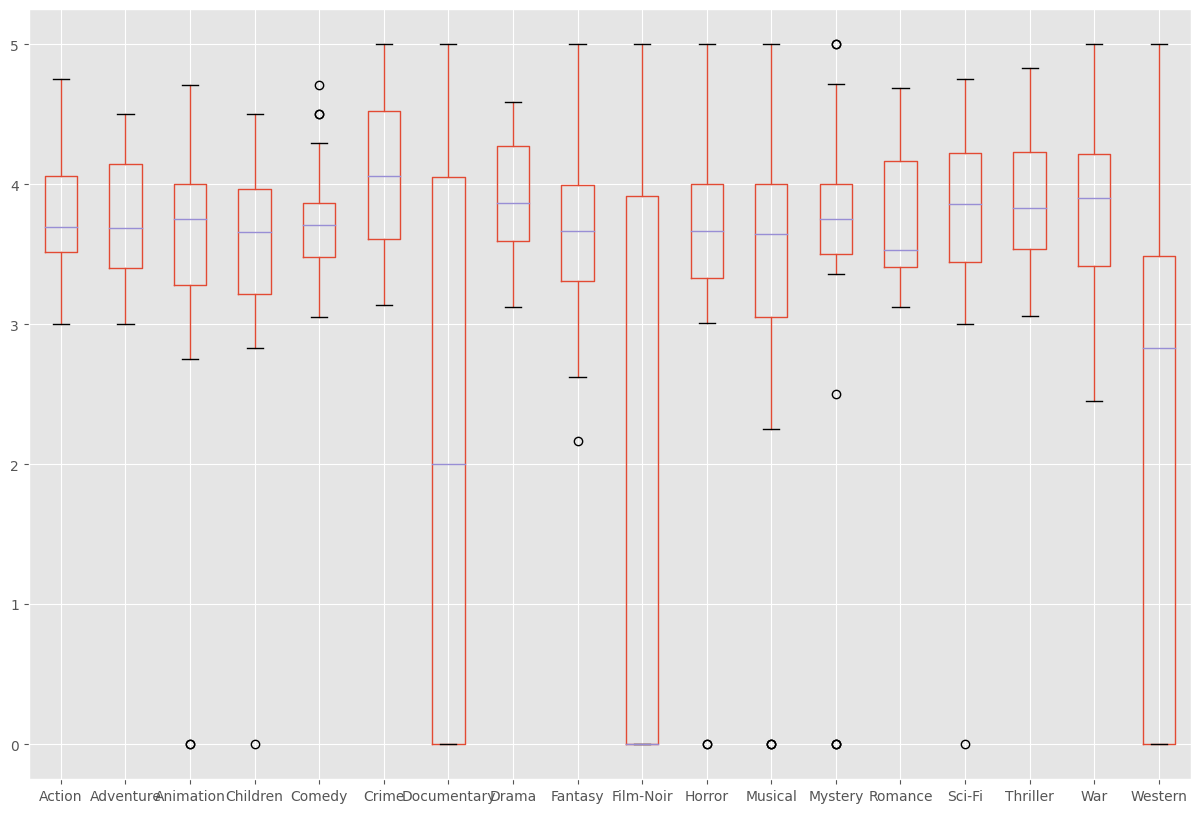

In [74]:
df_new.boxplot(figsize=(15,10))

In [75]:
# Стандартизирование значений
standard_scaler = StandardScaler()
standard_df = pd.DataFrame(data = standard_scaler.fit_transform(df_new), index = df_new.index, columns = df_new.columns)
standard_df

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0.748409,-0.006302,0.502983,0.411560,0.319508,0.070344,-0.005201,-0.087052,-0.064828,0.914089,0.051963,0.353539,0.094774,0.805765,-0.008111,0.860597,0.024877,0.132222
1,-0.169885,0.395277,0.172739,0.213696,-0.969671,-1.668392,-0.980843,-0.792386,0.544984,-0.792540,0.485710,0.043124,0.228197,-1.225564,0.331615,-0.134325,-0.757102,0.132222
2,-0.290566,-0.091095,0.485709,0.268869,-0.649574,-0.261240,0.563923,-0.034331,0.153726,1.304175,0.090519,0.268781,0.373481,-0.474467,-0.011928,-0.434646,-0.323147,0.865595
3,-1.265673,-1.467415,0.043264,-0.295096,-0.283989,-0.098194,1.019223,-0.379720,-1.286284,-0.792540,-0.251659,0.312025,0.312205,-0.642919,-0.580234,-0.749806,-0.924669,0.327788
4,-0.115708,0.284416,0.287054,-0.159201,-0.376649,0.221620,-0.980843,-0.195773,-0.224149,-0.792540,1.064039,0.363918,0.958849,-0.440777,0.409693,0.221004,1.030279,0.425571
5,0.480235,1.723471,-2.951875,1.172573,1.791589,0.893956,-0.980843,0.352348,2.165657,1.157893,0.485710,0.934743,0.450570,0.468862,0.846930,-0.489655,-1.483226,-1.334526
6,-1.665160,-0.888147,0.502983,0.221306,-0.251558,-1.391987,-0.980843,0.410135,0.041385,-0.792540,0.485710,0.571491,-2.395796,0.805765,-0.756271,-1.377978,1.868114,0.425571
7,-0.234897,-0.646737,-0.274360,-0.295096,0.268747,0.209396,-0.980843,-0.687819,-1.310424,1.645501,0.292934,-0.082363,0.371504,-0.576700,-0.427410,-0.140348,0.431825,0.425571
8,0.041404,1.101657,0.626371,0.699658,0.031054,-0.635609,1.458262,0.049613,0.837987,-0.792540,-0.175237,0.870639,0.247258,0.664483,0.349385,0.487501,-0.065352,0.257943
9,-0.354086,-0.428961,-0.504684,-0.729961,-1.166110,-0.475165,1.092396,-1.021780,-2.348420,-0.792540,0.160400,-0.155013,0.094774,-1.299880,0.312530,-0.796530,-0.086834,-1.334526


<Axes: >

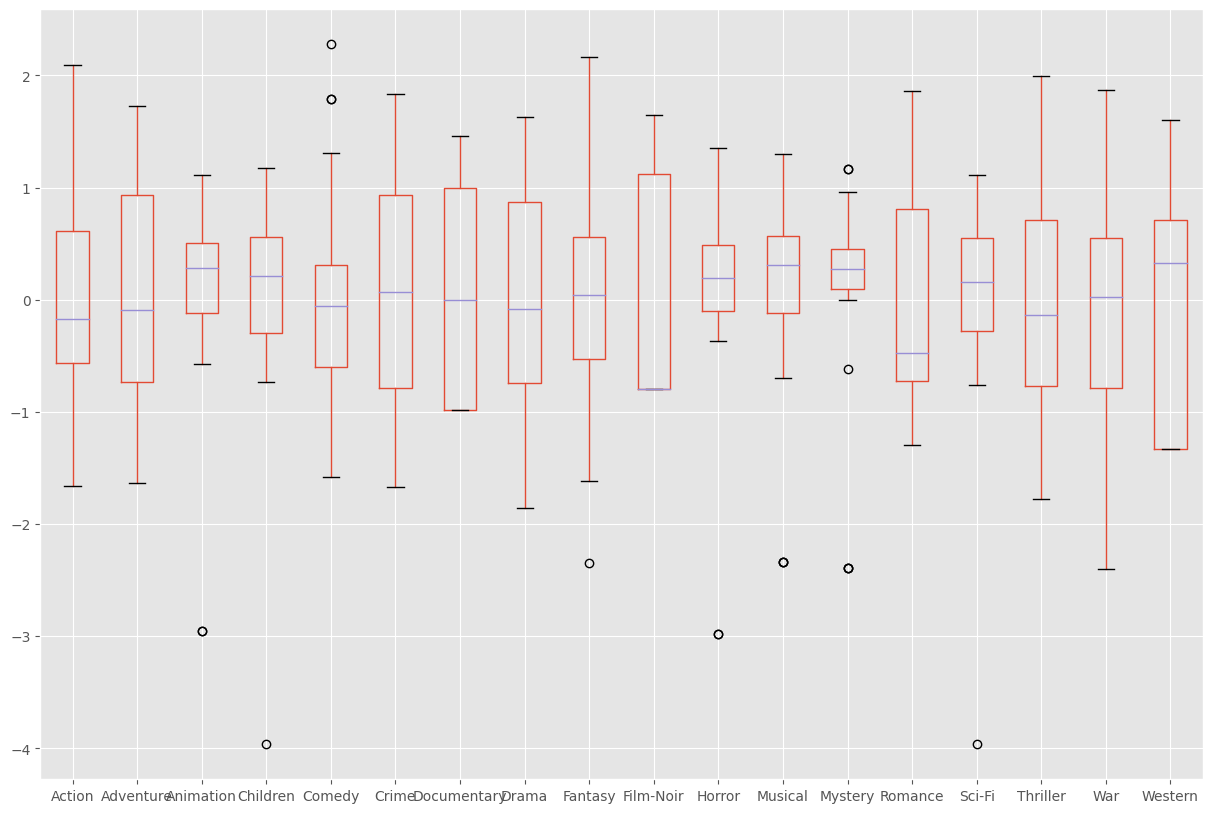

In [76]:
standard_df.boxplot(figsize=(15,10))

In [77]:
final_df = df_new.copy()

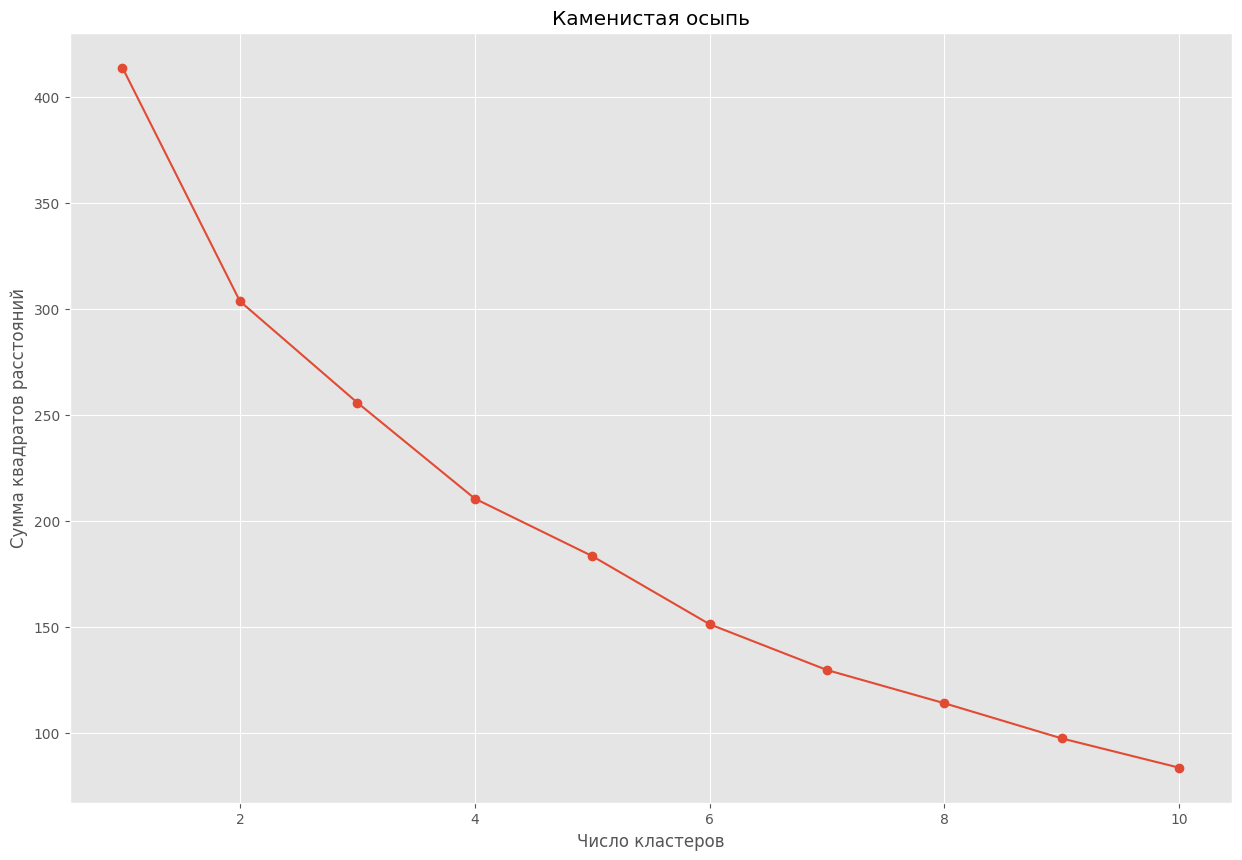

In [78]:
K = range(1, 11)
models = [KMeans(n_clusters = k, random_state = 111, n_init = 100, max_iter = 10000).fit(standard_df) for k in K]
dist = [model.inertia_ for model in models]

plt.figure(figsize=(15,10))
plt.plot(K, dist, marker='o')
plt.xlabel('Число кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.title('Каменистая осыпь')
plt.show()

In [79]:
for i in range(3,9):
  model = KMeans(n_clusters = i, random_state = 111, n_init = 100, max_iter = 10000)
  model.fit(standard_df)

  final_df[f'{i}_clusters'] = model.labels_

  print(final_df.groupby(f'{i}_clusters')[['Action', 'Adventure','Animation',
                                  'Children','Comedy', 'Crime', 'Documentary', 'Drama', 
                                  'Fantasy', 'Film-Noir', 'Horror', 'Musical',
                                  'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
                                  'War', 'Western']].mean())

              Action  Adventure  Animation  Children    Comedy     Crime  \
3_clusters                                                                 
0           4.011579   4.060451   3.177910  3.946032  3.906217  4.260005   
1           3.452161   3.395664   3.476590  3.057782  3.457380  3.722827   
2           4.660714   4.250000   4.142857  3.833333  4.604167  4.782051   

            Documentary     Drama   Fantasy  Film-Noir    Horror  Musical  \
3_clusters                                                                  
0              2.388889  4.188320  4.023928   1.833333  3.933862  4.00845   
1              2.062103  3.589696  3.244767   1.740278  3.309794  3.15262   
2              0.000000  4.516340  4.291667   0.000000  2.000000  0.00000   

             Mystery   Romance    Sci-Fi  Thriller       War   Western  
3_clusters                                                              
0           3.363858  4.012678  4.191009  4.116553  4.024044  2.919643  
1           3.

In [81]:
final_df.groupby('5_clusters')[['Action', 'Adventure','Animation',
                                  'Children','Comedy', 'Crime', 'Documentary', 'Drama', 
                                  'Fantasy', 'Film-Noir', 'Horror', 'Musical',
                                  'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
                                  'War', 'Western']].mean()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
5_clusters,,,,,,,,,,,,,,,,,,
0,3.413182,3.438130,3.524180,3.304338,3.456937,3.629892,2.474524,3.640712,3.306220,2.088333,3.571753,3.433144,3.316200,3.438029,3.466909,3.491681,3.639215,2.603981
1,4.660714,4.250000,4.142857,3.833333,4.604167,4.782051,0.000000,4.516340,4.291667,0.000000,2.000000,0.000000,4.500000,4.635417,4.625000,4.791667,4.750000,0.000000
2,3.500000,3.000000,2.750000,0.000000,3.055556,3.375000,0.000000,3.269231,3.250000,0.000000,4.000000,0.000000,0.000000,3.400000,0.000000,3.666667,4.000000,0.000000
3,4.011579,4.060451,3.177910,3.946032,3.906217,4.260005,2.388889,4.188320,4.023928,1.833333,3.933862,4.008450,3.363858,4.012678,4.191009,4.116553,4.024044,2.919643
4,3.794118,3.366667,3.727273,3.650000,3.863636,5.000000,0.000000,3.400000,2.625000,0.000000,0.000000,3.500000,5.000000,3.500000,3.636364,4.400000,3.250000,0.000000


In [82]:
#вывод назначенных кластеров
model.labels_.tolist()

[1, 5, 0, 0, 1, 7, 4, 0, 1, 5, 6, 0, 0, 3, 1, 3, 2, 5, 0, 1, 1, 1, 7]

In [83]:
X_pr = [3.413182, 3.438130,	3.524180,	3.304338,	3.456937,	3.629892,	2.474524,	3.640712,	3.306220,	2.088333,	3.571753,	3.433144,	3.316200,	3.438029,	3.466909,	3.491681,	3.639215,	2.603981]

In [ ]:
y_kmeans = model.fit_predict([3.413182, 3.438130,	3.524180,	3.304338,	3.456937,	3.629892,	2.474524,	3.640712,	3.306220,	2.088333,	3.571753,	3.433144,	3.316200,	3.438029,	3.466909,	3.491681,	3.639215,	2.603981]])

ValueError: ignored